In [14]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [7]:
# Data Load
df_buried = pd.read_csv('./data/폐기물처리시설_매립.csv', encoding='cp949')
df_buried = df_buried.T[df_buried.T[0].isin(["총매립용량 (m³)", "잔여매립가능량 (m³)", "구분(1)"])]

# Total Amount
df_buried_total = df_buried[df_buried[0].isin(["총매립용량 (m³)", "구분(1)"])].T.iloc[2:,:].reset_index(drop=True)
df_buried_total.columns = ['도시',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
df_buried_total.iloc[7,1] = 1  # Sejong, 2011 is marked as "-". Prevent from numeric cal error, or dividing by 0
df_buried_total.iloc[:,1:] = df_buried_total.iloc[:,1:].astype('int64')

# Left Amount
df_buried_left = df_buried[df_buried[0].isin(["잔여매립가능량 (m³)", "구분(1)"])].T.iloc[2:,:].reset_index(drop=True)
df_buried_left.columns = ['도시',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
df_buried_left.iloc[7,1] = 0  # Sejong, 2011 is marked as "-"
df_buried_left.iloc[:,1:] = df_buried_left.iloc[:,1:].astype('int64')

# Used Amount = Total - Left
df_buried_used = df_buried_total.copy()
df_buried_used.iloc[:,1:] = df_buried_used.iloc[:, 1:] - df_buried_left.iloc[:,1:]

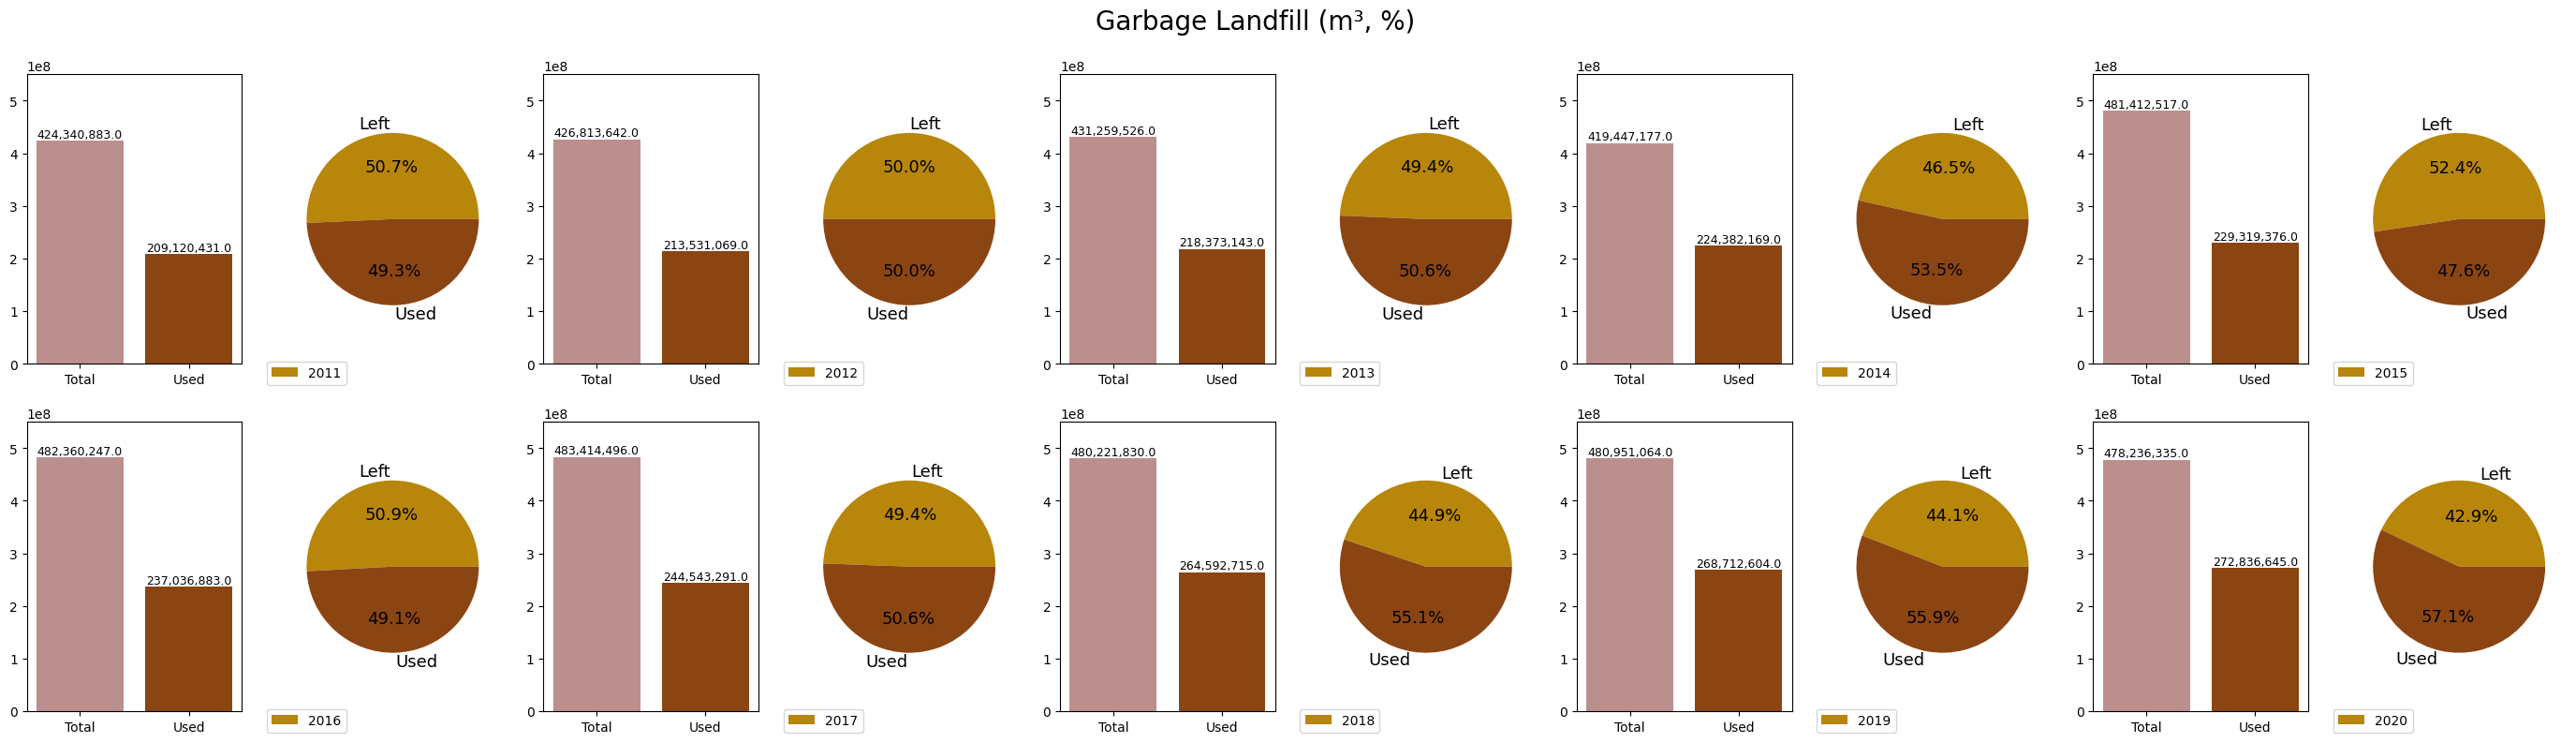

In [34]:
# Area of Landfills - Bar Plot and Pie chart
plt.rcParams['figure.figsize'] = (35,10)
plt.rcParams['font.size'] = 10

# Percent = Left / Total (*100 when plotting)
df_buried_percent = df_buried_left.copy()
df_buried_percent.iloc[:, 1:] = df_buried_percent.iloc[:,1:] / df_buried_total.iloc[:, 1:] * 100

# To List
total_landfill = df_buried_total.iloc[0,1:].to_list()
used_landfill = df_buried_used.iloc[0,1:].to_list()
left_landfill = df_buried_left.iloc[0,1:].to_list()
ratio_buried = df_buried_percent.iloc[0,1:].to_list()
ratio_total = [100-i for i in ratio_buried]

color = ['#B8860B', '#8B4513']
label = ['Left', 'Used']

for i in range(10):  # From 2011 to 2020
    # Bar plot
    plt.subplot(2,10,2*i+1)
    plt_bar_total = plt.bar('Total', total_landfill[i], color='#BC8F8F')
    plt_bar_used = plt.bar('Used', used_landfill[i], color='#8B4513')
    plt.ylim(0,550000000)

    for rect in plt_bar_total:  # Number Marking
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height, '{:,.1f}'.format(height), ha='center', va='bottom', size = 9)
    for rect in plt_bar_used:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height, '{:,.1f}'.format(height), ha='center', va='bottom', size = 9)
    # Pie Chart
    plt.subplot(2,10,2*i+2)
    plt.pie([ratio_buried[i], ratio_total[i]], colors=color, labels=label, autopct='%.1f%%', textprops={'size' : 13})

    plt.legend([str(2011+i)], loc='lower center', bbox_to_anchor=(0.1, -0.3))

plt.subplots_adjust(bottom=0.2)
plt.style.use("default")
plt.suptitle('Garbage Landfill (m³, %)',fontsize=20, y=0.95)

# Savefig
#plt.savefig('./plots/landfill_bar_pie.png', dpi=300, bbox_inches='tight')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_85138/919938507.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


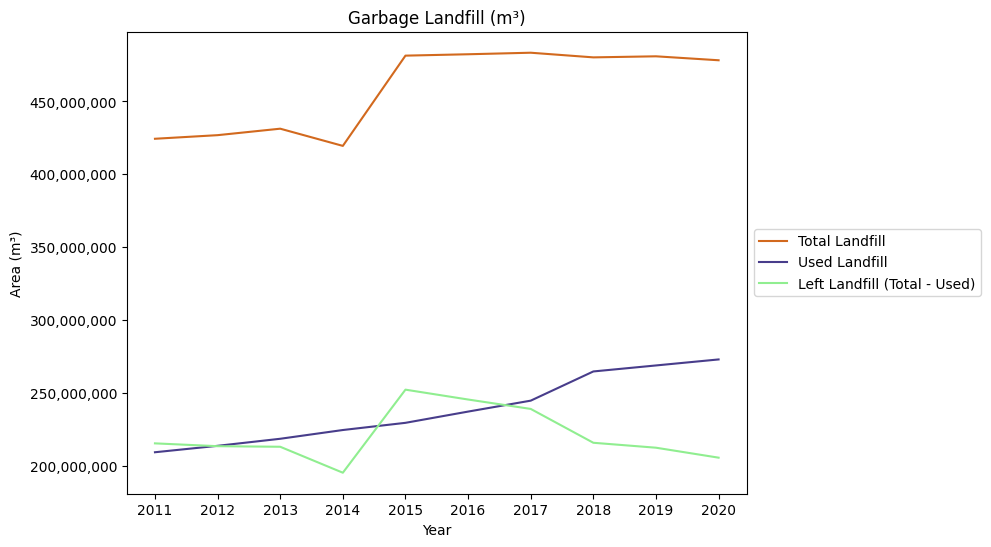

In [33]:
# Area of Landfills - Line Plot
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,6)

years = np.arange(2011,2021)
plt.plot(years, total_landfill, label='Total Landfill', color="#D2691E")
plt.plot(years, used_landfill, label='Used Landfill', color="#483D8B")
plt.plot(years, left_landfill, label='Left Landfill (Total - Used)', color='lightgreen')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(range(2011,2021))
plt.xlabel("Year")
plt.ylabel("Area (m³)")
plt.title('Garbage Landfill (m³)')

# Savefig
#plt.savefig('./plots/landfill_line.png', dpi=300, bbox_inches='tight')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_85138/1811692124.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


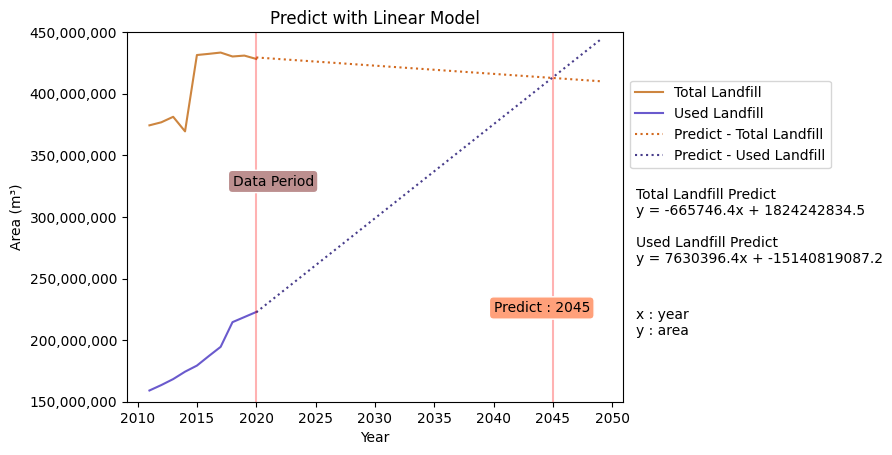

In [35]:
# Linear Regression
train_year = np.arange(2011,2021).reshape(-1,1)
test_year = np.arange(2020,2050).reshape(-1,1)

lr_used = LinearRegression()
lr_used.fit(train_year, used_landfill)
func_used = f"y = {round(lr_used.coef_[0], 1)}x + {round(lr_used.intercept_, 1)}"

lr_total = LinearRegression()
lr_total.fit(train_year[4:], total_landfill[4:])  # From 2014-2015 : Thought of Outlier, which is not meaningful
func_total = f"y = {round(lr_total.coef_[0], 1)}x + {round(lr_total.intercept_, 1)}"

plt.plot(years, total_landfill, label='Total Landfill', color="#CD853F")
plt.plot(years, used_landfill, label='Used Landfill', color="#6A5ACD")
plt.plot(test_year, lr_total.predict(test_year), label="Predict - Total Landfill", color="#D2691E", linestyle=":")
plt.plot(test_year, lr_used.predict(test_year), label='Predict - Used Landfill', color="#483D8B", linestyle=":")

# Data Period
plt.vlines(2020, 0, 500000000, colors="red", alpha=0.3)
plt.text(2018, (total_landfill[-1]+used_landfill[-1])/2, "Data Period", bbox={'boxstyle' : 'round', 'ec' : '#FFFFFF', 'fc' : "#BC8F8F"})

# When they meet
cross_x = (lr_used.intercept_-lr_total.intercept_)/(lr_total.coef_[0]-lr_used.coef_[0])
plt.vlines(round(cross_x), 0, 500000000, colors="red", alpha=0.3)
plt.text(round(cross_x)-5, used_landfill[-1], f"Predict : {round(cross_x)}", bbox={'boxstyle' : 'round', 'ec' : "#FFFFFF", 'fc' : "#FFA07A"})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.ylim(200000000, 500000000)
plt.title("Predict with Linear Model")
plt.xlabel("Year")
plt.ylabel("Area (m³)")
plt.gcf().text(0.92, 0.5, "Total Landfill Predict\n" + func_total, fontsize=10)
plt.gcf().text(0.92, 0.4, "Used Landfill Predict\n" + func_used, fontsize=10)
plt.gcf().text(0.92, 0.25, "x : year\ny : area", fontsize=10)

# Savefig
plt.savefig('./plots/landfill_LR.png', dpi=300, bbox_inches='tight')